Simple Linear Regression
---------------

In [3]:
#import all the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#set style for seaborn plots
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
#Read Loan.csv
advertising = pd.read_csv('D:\\Upgrad\\ML1\\advertising.csv',encoding = "ISO-8859-1", low_memory=False)
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


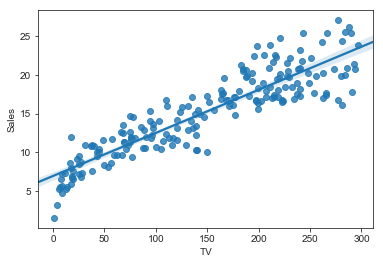

In [6]:
#visualize the data for TV sales
sns.regplot(x='TV',y='Sales',data=advertising)

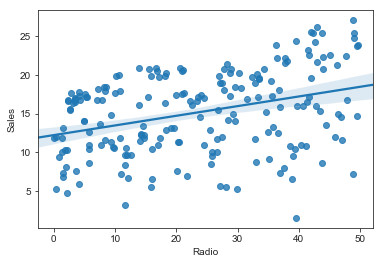

In [7]:
#visualize the data for TV sales
sns.regplot(x='Radio',y='Sales',data=advertising)

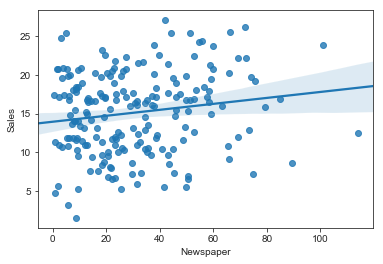

In [8]:
#visualize the data for TV sales
sns.regplot(x='Newspaper',y='Sales',data=advertising)

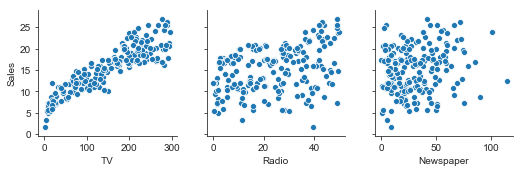

In [11]:
#Comparing each media type sales together using pairplot
sns.pairplot(data=advertising,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

In [12]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


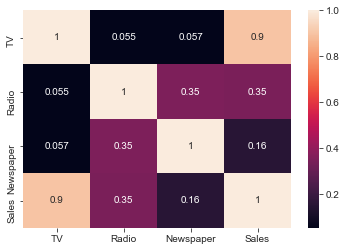

In [15]:
sns.heatmap(advertising.corr(),annot=True)